In [1]:
!pip install pandasql

In [2]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as ps

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 1.Age | Objective Feature | age | int (days)
#2.Height | Objective Feature | height | int (cm) |
#3.Weight | Objective Feature | weight | float (kg) |
#4.Gender | Objective Feature | gender | categorical code |120
#5.Systolic blood pressure | Examination Feature | ap_hi | int |80
#6.Diastolic blood pressure | Examination Feature | ap_lo | int |
#7.Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#8.Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#9.Smoking | Subjective Feature | smoke | binary |
#10.Alcohol intake | Subjective Feature | alco | binary |
#11.Physical activity | Subjective Feature | active | binary |
#12.Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [4]:
#Step-2
#Load the data
cdata=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\PROJECT\cardio_train.csv",header=0)
#Step -3
#Copy to back_up file
cdata_bk=cdata.copy()
#Display first 5 records
cdata.head()

,id,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Deleting Unwanted column
del cdata['id']

In [7]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age(in years)  70000 non-null  int64  
 1   gender         70000 non-null  int64  
 2   height         70000 non-null  int64  
 3   weight         70000 non-null  float64
 4   ap_hi          70000 non-null  int64  
 5   ap_lo          70000 non-null  int64  
 6   cholesterol    70000 non-null  int64  
 7   gluc           70000 non-null  int64  
 8   smoke          70000 non-null  int64  
 9   alco           70000 non-null  int64  
 10  active         70000 non-null  int64  
 11  cardio         70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


# Exploratory Data Analysis (EDA)

In [8]:
# Feature Extraction
#1.One way to do this is by calculating the Body Mass Index (BMI) and
#using it to categorize individuals into different BMI categories,
#which can be associated with diabetes risk.
# Calculate BMI
#Higher BMI values are generally associated with an increased risk of diabetes.
#Individualswith obesity (high BMI) are at a higher risk of developing type 2 diabetes.
cdata['bmi'] = cdata['weight'] / ((cdata['height'] / 100) ** 2)

# Define BMI categories
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new column 'bmi_category'
cdata['bmi_category'] = cdata['bmi'].apply(get_bmi_category)


In [9]:
#2.Calculate pulse pressure
#Pulse pressure is the difference between systolic and diastolic blood pressure.
#It is associated with arterial stiffness and can be a risk factor for cardiovascular diseases,
#including diabetes.
#Elevated pulse pressure may indicate increased cardiovascular risk, which is linked to diabetes.

cdata['pulse_pressure'] = cdata['ap_hi'] - cdata['ap_lo']


In [11]:
#3. Calculate mean arterial pressure (MAP)
#MAP is a measure of the average blood pressure in an individual's arteries during one cardiac cycle.
#It's another indicator of cardiovascular health and can be associated with diabetes risk.

cdata['map'] = cdata['ap_lo'] + 0.33 * (cdata['ap_hi'] - cdata['ap_lo'])


In [13]:
#Step -4
#Display the data set information
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   70000 non-null  int64  
 1   gender          70000 non-null  int64  
 2   height          70000 non-null  int64  
 3   weight          70000 non-null  float64
 4   ap_hi           70000 non-null  int64  
 5   ap_lo           70000 non-null  int64  
 6   cholesterol     70000 non-null  int64  
 7   gluc            70000 non-null  int64  
 8   smoke           70000 non-null  int64  
 9   alco            70000 non-null  int64  
 10  active          70000 non-null  int64  
 11  cardio          70000 non-null  int64  
 12  bmi             70000 non-null  float64
 13  bmi_category    70000 non-null  object 
 14  pulse_pressure  70000 non-null  int64  
 15  map             70000 non-null  float64
dtypes: float64(3), int64(12), object(1)
memory usage: 8.5+ MB


In [14]:
cdata.head()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight,30,89.9
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese,50,106.5
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight,60,89.8
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,50,116.5
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight,40,73.2


In [15]:
cdata.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [16]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (>= 10 : 1, then the dataset is imbalance data)
cardio_count = cdata.cardio.value_counts()
print("proportion:",cardio_count[0]/cardio_count[1],":1")

proportion: 1.0012007204322593 :1


In [17]:
#Step -5
#Display the unique values of the data set
cdata.nunique()

age(in years)     8076
gender               2
height             109
weight             287
ap_hi              153
ap_lo              157
cholesterol          3
gluc                 3
smoke                2
alco                 2
active               2
cardio               2
bmi               3808
bmi_category         4
pulse_pressure     305
map               1228
dtype: int64

In [18]:
# Count the missig values by each variable, if available
cdata.isnull().sum()

age(in years)     0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
bmi_category      0
pulse_pressure    0
map               0
dtype: int64

In [19]:
cdata.shape

(70000, 16)

In [20]:
#Step -6
#Check the duplicate  values with in  dataset if available
cdata_dup=cdata[cdata.duplicated(keep='last')]
cdata_dup

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1,25.909457,Overweight,40,93.2
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0,24.977043,Obese,40,93.2
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0,22.038567,Normal weight,40,93.2
1612,20293,1,162,70.0,110,70,1,1,0,0,1,0,26.672763,Overweight,40,83.2
2305,20495,1,165,70.0,120,80,1,1,0,0,1,0,25.711662,Overweight,40,93.2
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1,22.530612,Normal weight,40,93.2
6325,14552,1,158,64.0,120,80,1,1,0,0,1,0,25.636917,Overweight,40,93.2
8190,21778,1,160,58.0,120,80,1,1,0,0,1,0,22.656250,Normal weight,40,93.2
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0,24.221453,Normal weight,40,93.2
10777,18988,1,164,65.0,120,80,1,1,0,0,1,0,24.167162,Normal weight,40,93.2


In [21]:
cdata=cdata.drop_duplicates()#before 70000
cdata.shape

(69976, 16)

In [22]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   69976 non-null  int64  
 1   gender          69976 non-null  int64  
 2   height          69976 non-null  int64  
 3   weight          69976 non-null  float64
 4   ap_hi           69976 non-null  int64  
 5   ap_lo           69976 non-null  int64  
 6   cholesterol     69976 non-null  int64  
 7   gluc            69976 non-null  int64  
 8   smoke           69976 non-null  int64  
 9   alco            69976 non-null  int64  
 10  active          69976 non-null  int64  
 11  cardio          69976 non-null  int64  
 12  bmi             69976 non-null  float64
 13  bmi_category    69976 non-null  object 
 14  pulse_pressure  69976 non-null  int64  
 15  map             69976 non-null  float64
dtypes: float64(3), int64(12), object(1)
memory usage: 9.1+ MB


In [23]:
#Step -8,9
#use LabelEncoder for target variable
#Step -8,9
#use LabelEncoder for target variable
object_col = ["bmi_category"]
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in object_col:
    cdata[col] = LE.fit_transform(cdata[col])


<Axes: xlabel='cardio', ylabel='Count'>

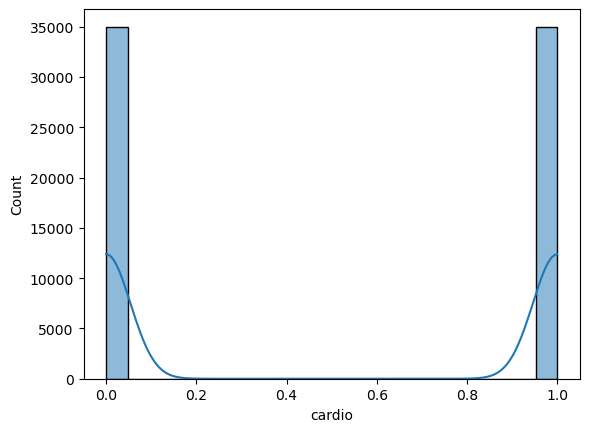

In [24]:
#Step 7
# plotting histogram for the target variable.
sns.histplot(cdata['cardio'],kde=True)

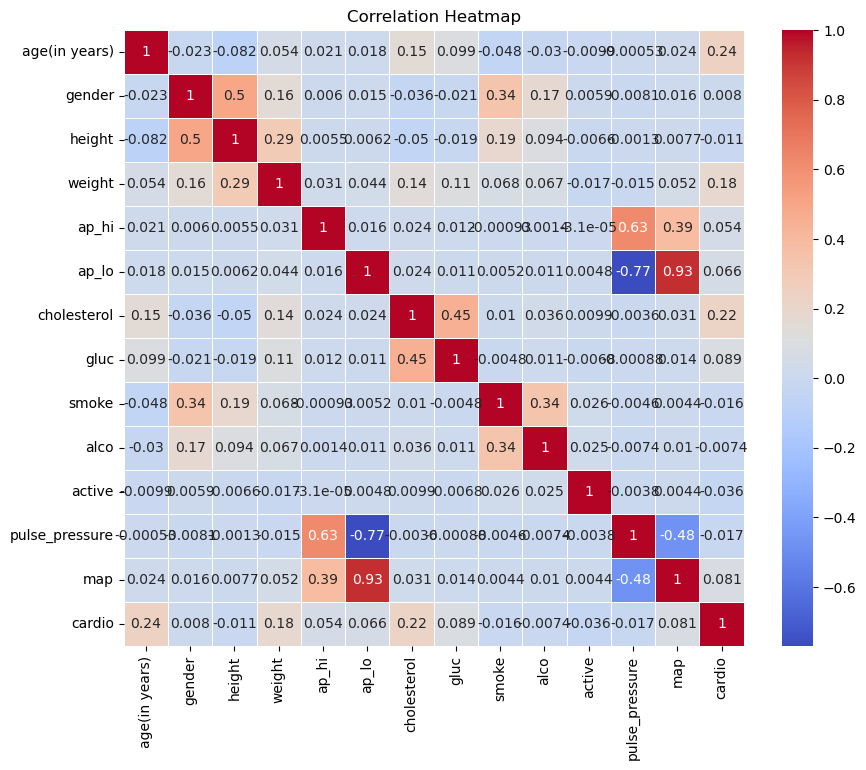

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Specify the target variable and independent variables
target_variable = 'cardio' # Replace with the actual target variable name
independent_variables = ['age(in years)', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active','pulse_pressure', 'map']  # Replace with the actual independent variable names

# Calculate the correlation matrix
correlation_matrix = cdata[independent_variables + [target_variable]].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


In [26]:
# Finding Correlation Between Target and Remaining Variables
cdata.corrwith(cdata['cardio'])

age(in years)     0.238189
gender            0.008037
height           -0.010871
weight            0.181599
ap_hi             0.054475
ap_lo             0.065717
cholesterol       0.221119
gluc              0.089268
smoke            -0.015533
alco             -0.007366
active           -0.035666
cardio            1.000000
bmi               0.165596
bmi_category      0.081752
pulse_pressure   -0.016548
map               0.080855
dtype: float64

In [27]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   69976 non-null  int64  
 1   gender          69976 non-null  int64  
 2   height          69976 non-null  int64  
 3   weight          69976 non-null  float64
 4   ap_hi           69976 non-null  int64  
 5   ap_lo           69976 non-null  int64  
 6   cholesterol     69976 non-null  int64  
 7   gluc            69976 non-null  int64  
 8   smoke           69976 non-null  int64  
 9   alco            69976 non-null  int64  
 10  active          69976 non-null  int64  
 11  cardio          69976 non-null  int64  
 12  bmi             69976 non-null  float64
 13  bmi_category    69976 non-null  int32  
 14  pulse_pressure  69976 non-null  int64  
 15  map             69976 non-null  float64
dtypes: float64(3), int32(1), int64(12)
memory usage: 8.8 MB


In [28]:
cdata.head()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,30,89.9
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1,50,106.5
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,60,89.8
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2,50,116.5
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,40,73.2


# Outliers Detection

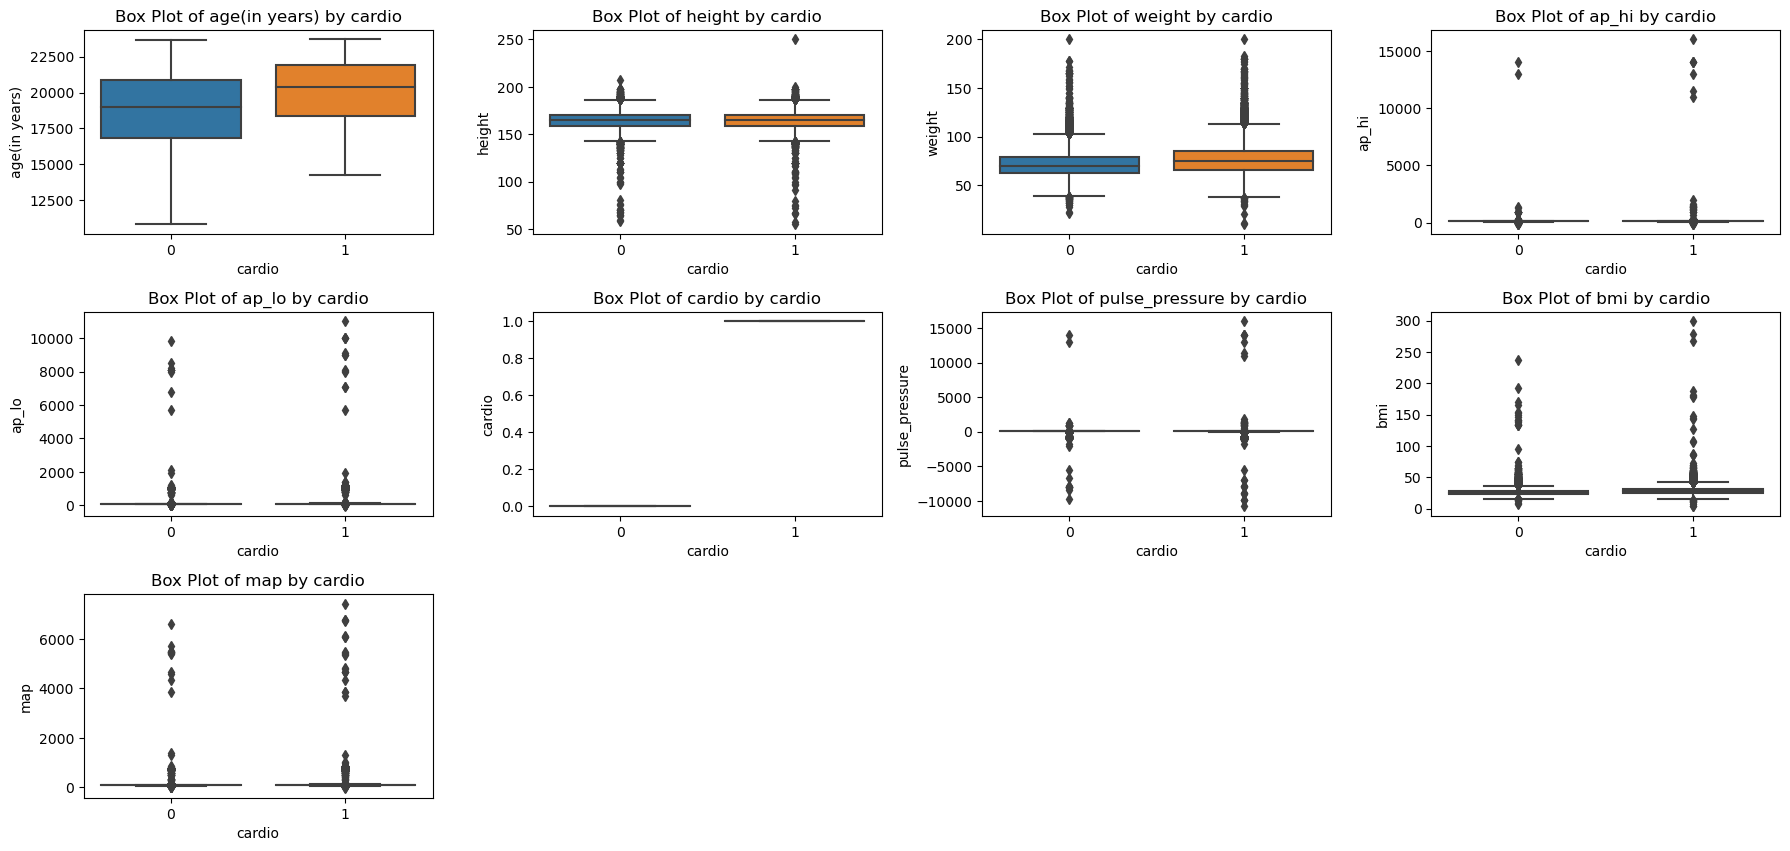

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'sdata'
plt.figure(figsize=(18, 11))

numerical_columns=['age(in years)','height','weight','ap_hi','ap_lo','cardio','pulse_pressure','bmi','map']

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='cardio', y=col, data=cdata)
    plt.title(f'Box Plot of {col} by cardio')
    plt.xlabel('cardio')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


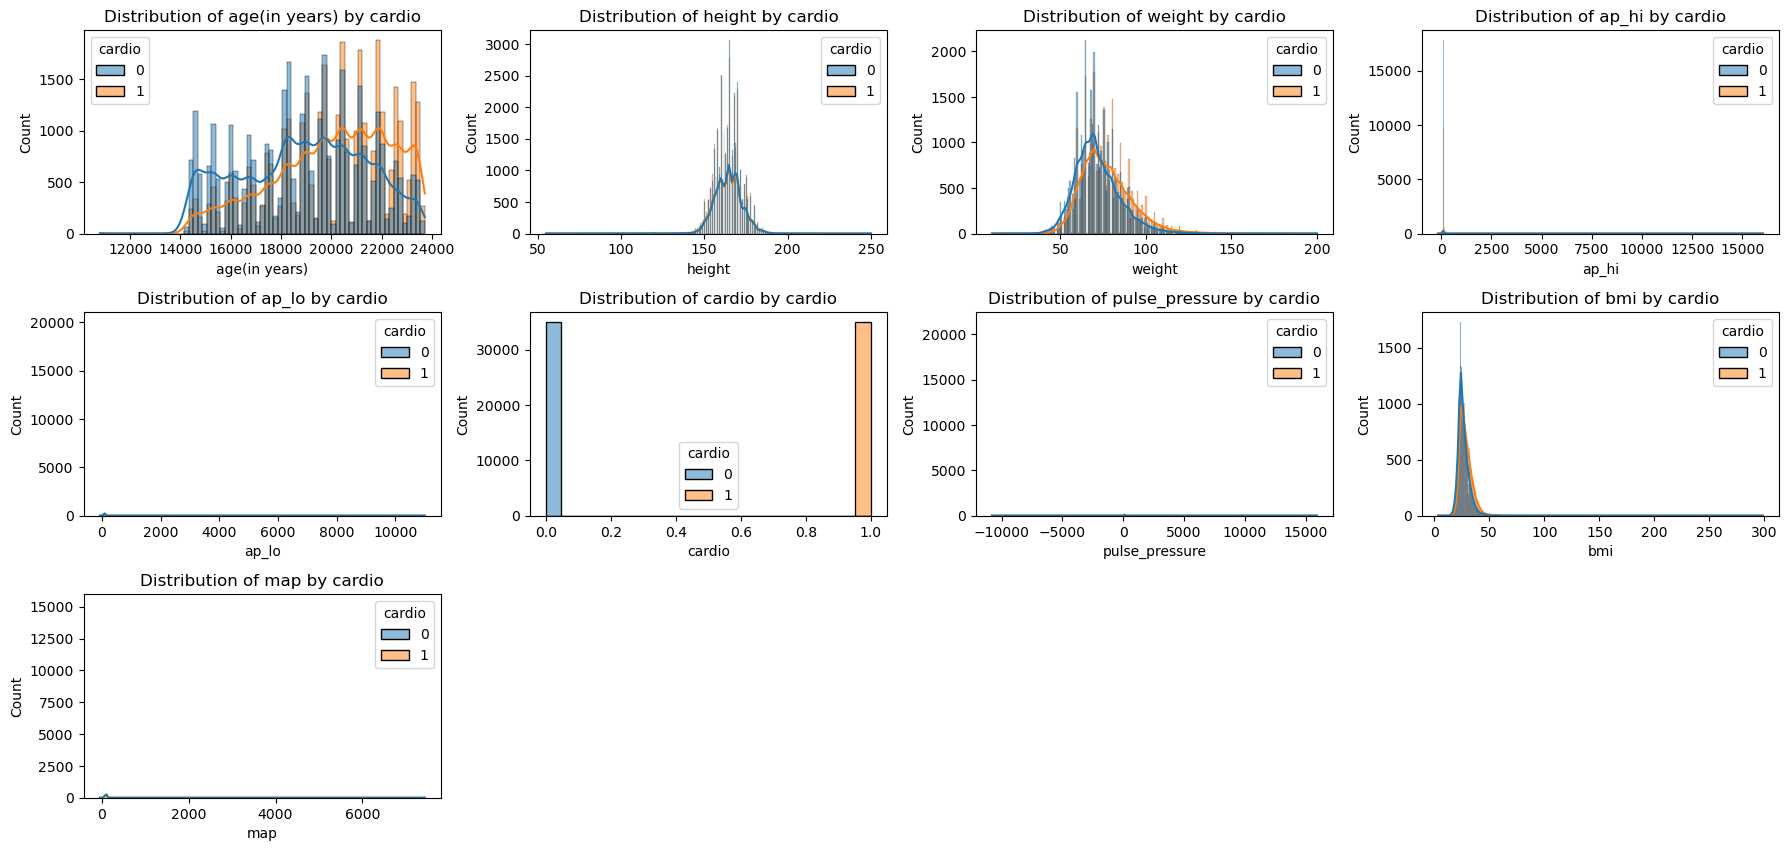

In [30]:
plt.figure(figsize=(18,11))
numerical_columns=['age(in years)','height','weight','ap_hi','ap_lo','cardio','pulse_pressure','bmi','map']
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=cdata, x=col, hue='cardio', kde=True)
    plt.title(f'Distribution of {col} by cardio')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Removing Outliers

In [31]:
import pandas as pd
from scipy import stats

# Define the numerical columns for outlier detection
numerical_columns=['age(in years)','height','weight','ap_hi','ap_lo','pulse_pressure','bmi','map']
# Calculate Z-Scores for each numerical variable
z_scores = pd.DataFrame()
for col in numerical_columns:
    z_scores[col] = stats.zscore(cdata[col])

# Define the Z-Score threshold for outlier detection
z_score_threshold = 3

# Find and remove rows with outliers based on the threshold
cdatan = cdata[(z_scores.abs() <= z_score_threshold).all(axis=1)]

# Display the cleaned dataset without outliers
print("Cleaned dataset without outliers:")
print(cdatan.head())


Cleaned dataset without outliers:
   age(in years)  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          18393       2     168    62.0    110     80            1     1   
1          20228       1     156    85.0    140     90            3     1   
2          18857       1     165    64.0    130     70            3     1   
3          17623       2     169    82.0    150    100            1     1   
4          17474       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio        bmi  bmi_category  pulse_pressure    map  
0      0     0       1       0  21.967120             0              30   89.9  
1      0     0       1       1  34.927679             1              50  106.5  
2      0     0       0       1  23.507805             0              60   89.8  
3      0     0       1       1  28.710479             2              50  116.5  
4      0     0       0       0  23.011177             0              40   73.2  


In [34]:
cdata.shape

(69976, 16)

In [35]:
cdatan.shape

(67930, 16)

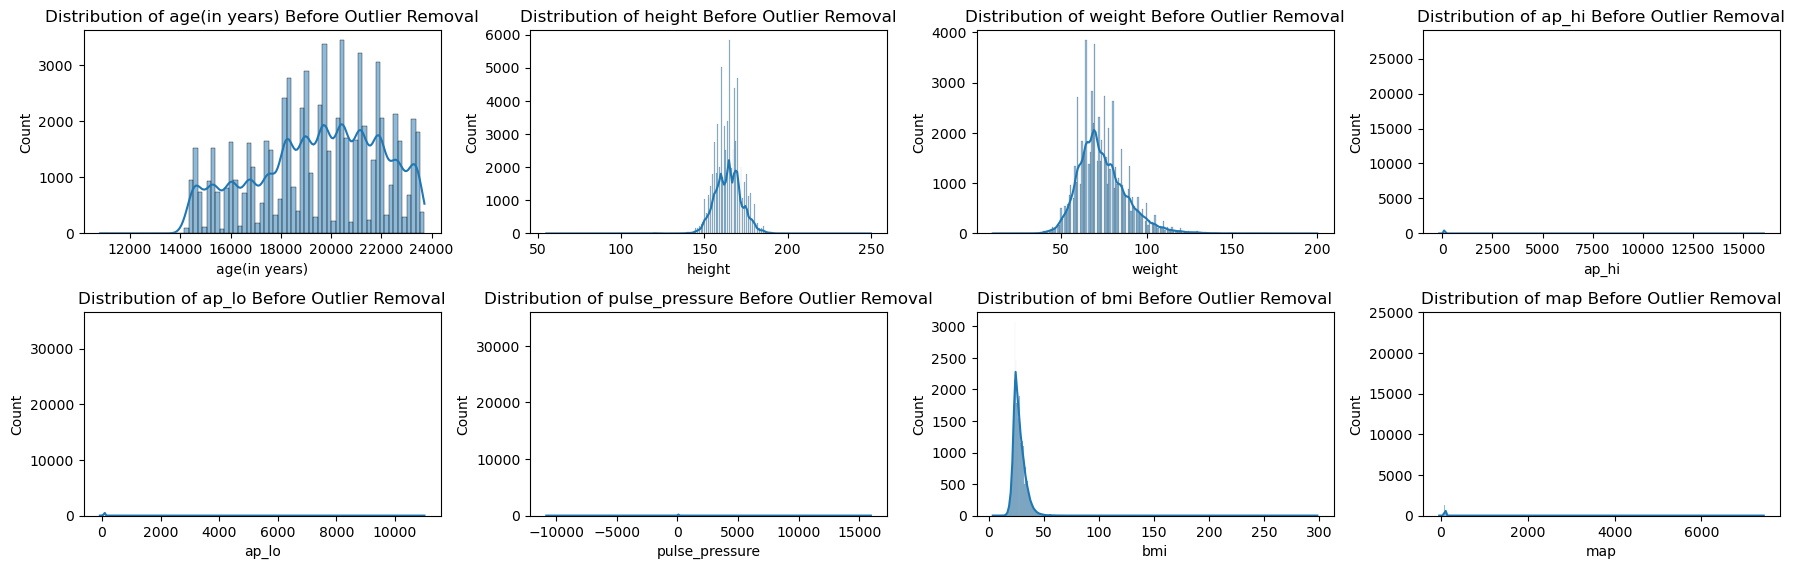

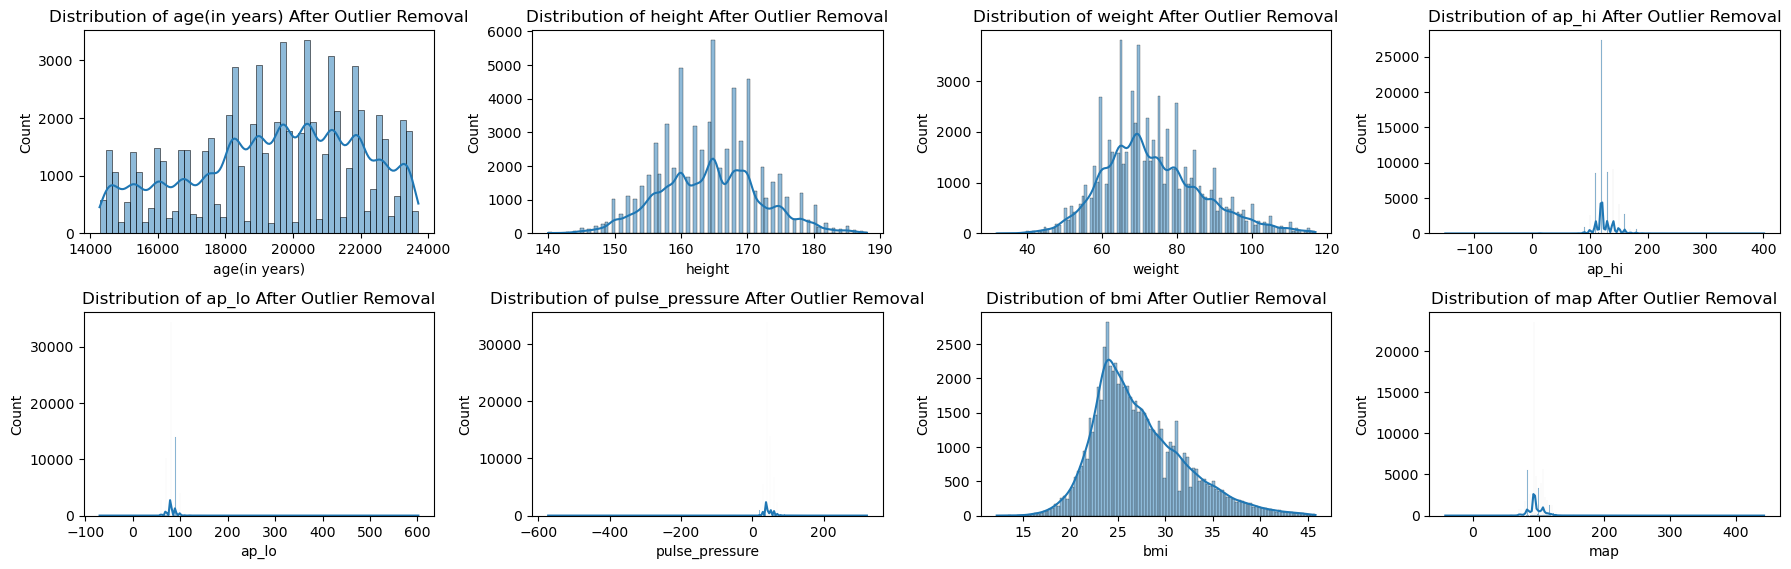

In [36]:
# Create histograms for numerical variables before and after outlier removal
plt.figure(figsize=(18, 11))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=cdata, x=col, kde=True)
    plt.title(f'Distribution of {col} Before Outlier Removal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 11))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=cdatan, x=col, kde=True)
    plt.title(f'Distribution of {col} After Outlier Removal')

plt.tight_layout()
plt.show()

In [37]:
cols=['age(in years)','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio','pulse_pressure','bmi','bmi_category','map']
bs=cdatan[cols]
bs.corr()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,bmi,bmi_category,map
age(in years),1.000000,-0.021561,-0.085036,0.064851,0.197656,0.147692,0.156276,0.099143,-0.046752,-0.028244,-0.010751,0.242026,0.141903,0.114238,0.051641,0.190411
gender,-0.021561,1.000000,0.522856,0.166794,0.056586,0.064496,-0.036742,-0.021436,0.338501,0.169855,0.006156,0.006472,0.024610,-0.116211,0.010314,0.067839
height,-0.085036,0.522856,1.000000,0.324254,0.012465,0.032449,-0.058145,-0.021968,0.194951,0.096625,-0.008281,-0.015354,-0.007729,-0.208140,-0.027499,0.025887
weight,0.064851,0.166794,0.324254,1.000000,0.243672,0.231707,0.137535,0.098326,0.067164,0.068214,-0.017079,0.178884,0.139160,0.853661,0.311964,0.264516
ap_hi,0.197656,0.056586,0.012465,0.243672,1.000000,0.606445,0.182434,0.084476,0.027406,0.030327,0.001805,0.396329,0.819411,0.245010,0.096349,0.878892
ap_lo,0.147692,0.064496,0.032449,0.231707,0.606445,1.000000,0.148479,0.069595,0.022554,0.040037,-0.001004,0.315155,0.041158,0.221737,0.089515,0.912291
cholesterol,0.156276,-0.036742,-0.058145,0.137535,0.182434,0.148479,1.000000,0.449902,0.009285,0.034879,0.009393,0.221186,0.122207,0.172759,0.059514,0.183042
gluc,0.099143,-0.021436,-0.021968,0.098326,0.084476,0.069595,0.449902,1.000000,-0.007318,0.009375,-0.007862,0.088933,0.055981,0.112709,0.031931,0.085263
smoke,-0.046752,0.338501,0.194951,0.067164,0.027406,0.022554,0.009285,-0.007318,1.000000,0.341218,0.026741,-0.017128,0.018179,-0.037719,0.017024,0.027647
alco,-0.028244,0.169855,0.096625,0.068214,0.030327,0.040037,0.034879,0.009375,0.341218,1.000000,0.026162,-0.008416,0.009247,0.016542,0.024143,0.039640


In [38]:
# Count the missig values by each variable, if available
cdatan.isnull().sum()

age(in years)     0
gender            0
height            0
weight            0
ap_hi             0
ap_lo             0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
bmi               0
bmi_category      0
pulse_pressure    0
map               0
dtype: int64

In [39]:
#Step -6
#Check the duplicate  values with in  dataset if available
cdata_dup=cdatan[cdatan.duplicated(keep='last')]
cdata_dup

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map


In [40]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (>= 10 : 1, then the dataset is imbalance data)
cardio_count = cdatan.cardio.value_counts()
print("proportion:",cardio_count[0]/cardio_count[1],":1")

proportion: 1.0295787272184045 :1


In [41]:
# Display descriptive statistics
cdatan.describe()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
count,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000,67930.000000
mean,19465.869601,1.347843,164.393405,73.508992,126.156028,81.278154,1.361828,1.223406,0.087369,0.053217,0.803754,0.492713,27.233193,1.019034,44.877874,96.087852
std,2467.242916,0.476290,7.679186,13.128387,17.829814,10.228819,0.676889,0.569347,0.282378,0.224467,0.397160,0.499951,4.787117,0.869788,14.188959,11.423472
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.254473,0.000000,-572.000000,-41.950000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000,40.000000,93.200000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.259585,1.000000,40.000000,93.200000
75%,21323.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.043262,2.000000,50.000000,103.200000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,45.785640,3.000000,321.000000,442.940000


In [42]:
# Finding Correlation Between Target and Remaining Variables
cdatan.corrwith(cdatan['cardio'])

age(in years)     0.242026
gender            0.006472
height           -0.015354
weight            0.178884
ap_hi             0.396329
ap_lo             0.315155
cholesterol       0.221186
gluc              0.088933
smoke            -0.017128
alco             -0.008416
active           -0.037414
cardio            1.000000
bmi               0.192729
bmi_category      0.081754
pulse_pressure    0.270832
map               0.393207
dtype: float64

# Correlation based analysis -0.7 t0 0.7

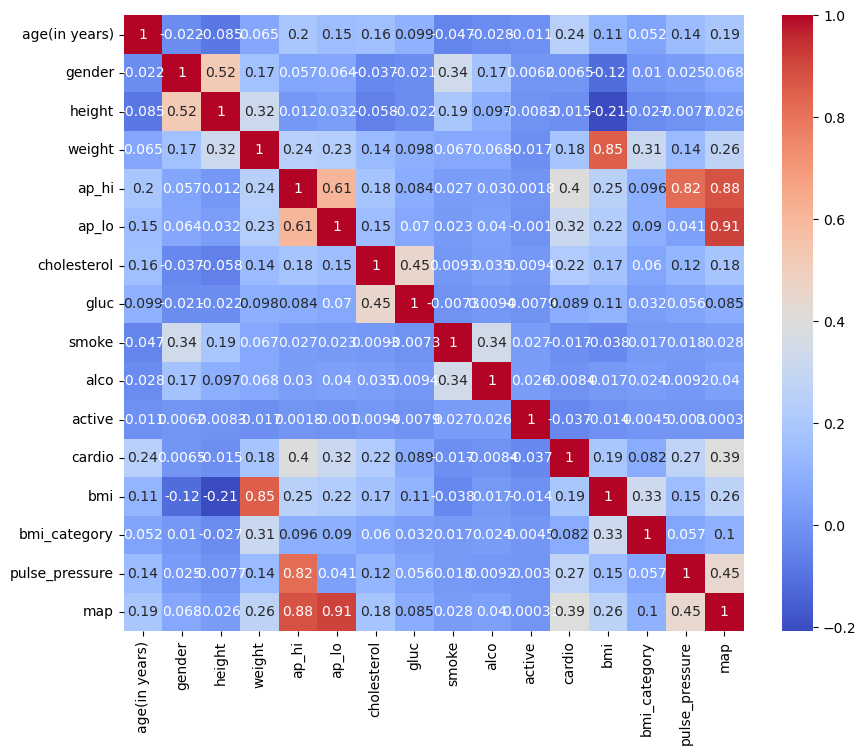

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
corr_matrix = cdatan.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Define your correlation threshold
threshold = 0.7

# Identify pairs of highly correlated features
correlation_pairs = (corr_matrix.abs() > threshold) & (corr_matrix.abs() < -0.7)

# Drop one of each pair of correlated features
columns_to_drop = set()
for i in range(len(correlation_pairs.columns)):
    for j in range(i):
        if correlation_pairs.iloc[i, j]:
            colname = correlation_pairs.columns[i]
            columns_to_drop.add(colname)

# Drop the identified columns
cdatan1 = cdatan.drop(columns=columns_to_drop)
#from google.colab import files

# Assuming cdatan1 is your new DataFrame after dropping correlated columns
cdatan1.to_csv('new_data_without_correlated_columns22.csv', index=False)

# Download the file to your local machine
#files.download('new_data_without_correlated_columns22.csv')


In [45]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69976 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   69976 non-null  int64  
 1   gender          69976 non-null  int64  
 2   height          69976 non-null  int64  
 3   weight          69976 non-null  float64
 4   ap_hi           69976 non-null  int64  
 5   ap_lo           69976 non-null  int64  
 6   cholesterol     69976 non-null  int64  
 7   gluc            69976 non-null  int64  
 8   smoke           69976 non-null  int64  
 9   alco            69976 non-null  int64  
 10  active          69976 non-null  int64  
 11  cardio          69976 non-null  int64  
 12  bmi             69976 non-null  float64
 13  bmi_category    69976 non-null  int32  
 14  pulse_pressure  69976 non-null  int64  
 15  map             69976 non-null  float64
dtypes: float64(3), int32(1), int64(12)
memory usage: 8.8 MB


In [46]:
cdatan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67930 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   67930 non-null  int64  
 1   gender          67930 non-null  int64  
 2   height          67930 non-null  int64  
 3   weight          67930 non-null  float64
 4   ap_hi           67930 non-null  int64  
 5   ap_lo           67930 non-null  int64  
 6   cholesterol     67930 non-null  int64  
 7   gluc            67930 non-null  int64  
 8   smoke           67930 non-null  int64  
 9   alco            67930 non-null  int64  
 10  active          67930 non-null  int64  
 11  cardio          67930 non-null  int64  
 12  bmi             67930 non-null  float64
 13  bmi_category    67930 non-null  int32  
 14  pulse_pressure  67930 non-null  int64  
 15  map             67930 non-null  float64
dtypes: float64(3), int32(1), int64(12)
memory usage: 8.6 MB


In [47]:
cdatan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67930 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age(in years)   67930 non-null  int64  
 1   gender          67930 non-null  int64  
 2   height          67930 non-null  int64  
 3   weight          67930 non-null  float64
 4   ap_hi           67930 non-null  int64  
 5   ap_lo           67930 non-null  int64  
 6   cholesterol     67930 non-null  int64  
 7   gluc            67930 non-null  int64  
 8   smoke           67930 non-null  int64  
 9   alco            67930 non-null  int64  
 10  active          67930 non-null  int64  
 11  cardio          67930 non-null  int64  
 12  bmi             67930 non-null  float64
 13  bmi_category    67930 non-null  int32  
 14  pulse_pressure  67930 non-null  int64  
 15  map             67930 non-null  float64
dtypes: float64(3), int32(1), int64(12)
memory usage: 8.6 MB


In [48]:
#Display the dataset
cdatan1.head()

,age(in years),gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,pulse_pressure,map
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,30,89.9
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1,50,106.5
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,60,89.8
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2,50,116.5
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,40,73.2


In [49]:
cdatan1.columns

Index(['age(in years)', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'bmi_category', 'pulse_pressure', 'map'],
      dtype='object')

In [50]:
#Identify the variables to normalize with minmaxscalar
cols=['age(in years)','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','bmi','bmi_category','pulse_pressure','map']

In [51]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in cdatan.columns:
    if col != 'cardio':
        IndepVar.append(col)
TargetVar = 'cardio'
x = cdatan[IndepVar]
y = cdatan[TargetVar]

In [52]:
# Random oversampling can be implemented using the RandomOverSampler class

#from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy=0.125)

#x_over, y_over = oversample.fit_resample(x, y)

#print(x_over.shape)

#print(y_over.shape)

In [53]:
#Step -11
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

# Display the shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((47551, 15), (20379, 15), (47551,), (20379,))

In [54]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)


In [56]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\EMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM- Linear,Poly,Gaussian,Sigmoid Kernel

Confusion matrix (sigmoid kernel): 
 [[1846 8212]
 [3003 7318]]
Outcome values (sigmoid kernel): 
 1846 8212 3003 7318
Classification report (sigmoid kernel): 
               precision    recall  f1-score   support

           1       0.38      0.18      0.25     10058
           0       0.47      0.71      0.57     10321

    accuracy                           0.45     20379
   macro avg       0.43      0.45      0.41     20379
weighted avg       0.43      0.45      0.41     20379

Accuracy (sigmoid kernel): 45.0 %
Precision (sigmoid kernel): 38.1 %
Recall (sigmoid kernel): 18.4 %
F1 Score (sigmoid kernel): 0.248
Specificity or True Negative Rate (sigmoid kernel): 70.9 %
Balanced Accuracy (sigmoid kernel): 44.6 %
MCC (sigmoid kernel): -0.126
roc_auc_score (sigmoid kernel): 0.446


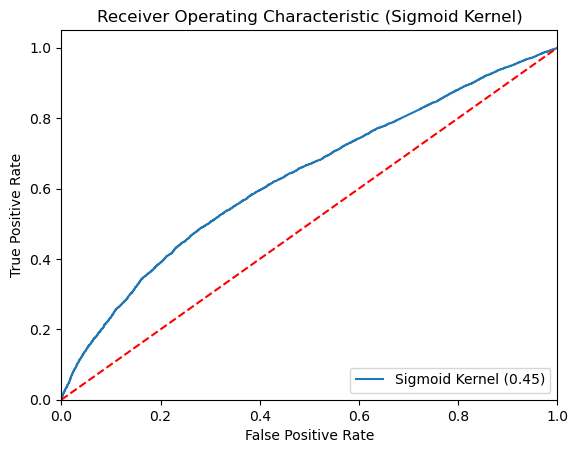

Confusion matrix (poly kernel): 
 [[10032    26]
 [10301    20]]
Outcome values (poly kernel): 
 10032 26 10301 20
Classification report (poly kernel): 
               precision    recall  f1-score   support

           1       0.49      1.00      0.66     10058
           0       0.43      0.00      0.00     10321

    accuracy                           0.49     20379
   macro avg       0.46      0.50      0.33     20379
weighted avg       0.46      0.49      0.33     20379

Accuracy (poly kernel): 49.3 %
Precision (poly kernel): 49.3 %
Recall (poly kernel): 99.7 %
F1 Score (poly kernel): 0.66
Specificity or True Negative Rate (poly kernel): 0.2 %
Balanced Accuracy (poly kernel): 50.0 %
MCC (poly kernel): -0.007
roc_auc_score (poly kernel): 0.5


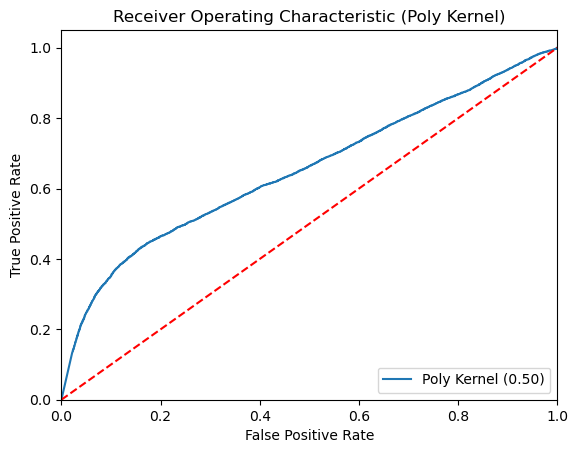

Confusion matrix (rbf kernel): 
 [[10034    24]
 [10301    20]]
Outcome values (rbf kernel): 
 10034 24 10301 20
Classification report (rbf kernel): 
               precision    recall  f1-score   support

           1       0.49      1.00      0.66     10058
           0       0.45      0.00      0.00     10321

    accuracy                           0.49     20379
   macro avg       0.47      0.50      0.33     20379
weighted avg       0.47      0.49      0.33     20379

Accuracy (rbf kernel): 49.3 %
Precision (rbf kernel): 49.3 %
Recall (rbf kernel): 99.8 %
F1 Score (rbf kernel): 0.66
Specificity or True Negative Rate (rbf kernel): 0.2 %
Balanced Accuracy (rbf kernel): 50.0 %
MCC (rbf kernel): -0.005
roc_auc_score (rbf kernel): 0.5


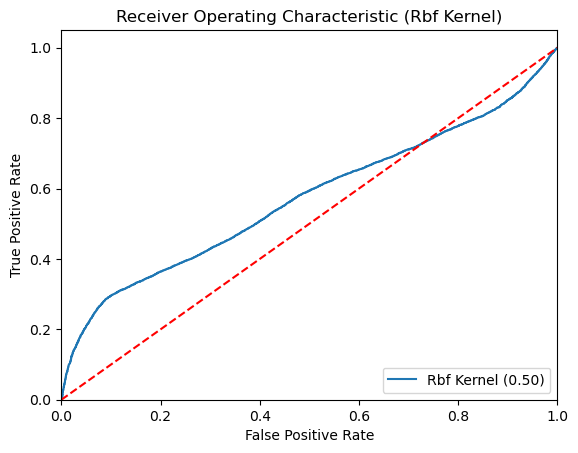

Confusion matrix (linear kernel): 
 [[10031    27]
 [10302    19]]
Outcome values (linear kernel): 
 10031 27 10302 19
Classification report (linear kernel): 
               precision    recall  f1-score   support

           1       0.49      1.00      0.66     10058
           0       0.41      0.00      0.00     10321

    accuracy                           0.49     20379
   macro avg       0.45      0.50      0.33     20379
weighted avg       0.45      0.49      0.33     20379

Accuracy (linear kernel): 49.3 %
Precision (linear kernel): 49.3 %
Recall (linear kernel): 99.7 %
F1 Score (linear kernel): 0.66
Specificity or True Negative Rate (linear kernel): 0.2 %
Balanced Accuracy (linear kernel): 50.0 %
MCC (linear kernel): -0.009
roc_auc_score (linear kernel): 0.5


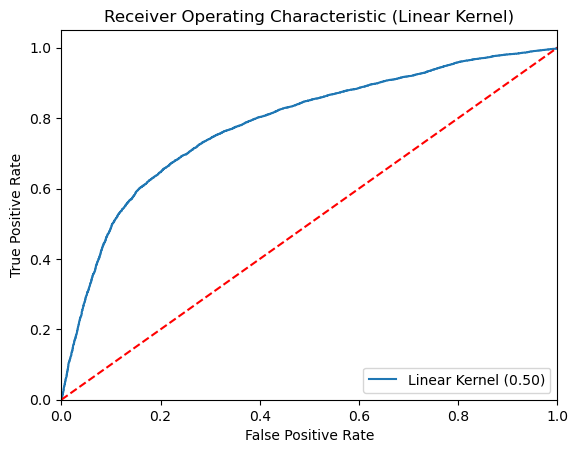

In [57]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Assuming SVMResults is a pandas DataFrame initialized before this code
SVMResults = pd.DataFrame(columns=['Model Name', 'True_Positive', 'False_Negative', 'False_Positive',
                                   'True_Negative', 'Accuracy', 'Precision', 'Recall', 'F1 Score',
                                   'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'])

# List of kernels
kernels = ['sigmoid', 'poly', 'rbf', 'linear']

for kernel in kernels:
    # Creating the SVM model for each kernel
    model = SVC(kernel=kernel, random_state=42, class_weight='balanced', probability=True)

    # Training the model
    model.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1, 0], sample_weight=None, normalize=None)
    print(f'Confusion matrix ({kernel} kernel): \n', matrix)

    # Outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).reshape(-1)
    print(f'Outcome values ({kernel} kernel): \n', tp, fn, fp, tn)

    # Classification Report
    c_report = classification_report(y_test, y_pred, labels=[1, 0])
    print(f'Classification report ({kernel} kernel): \n', c_report)

    # Calculating the metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1_score = round((2 * tp / (2 * tp + fp + fn)), 3)

    # Matthews Correlation Coefficient (MCC)
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    mcc = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print(f'Accuracy ({kernel} kernel):', round(accuracy * 100, 2), '%')
    print(f'Precision ({kernel} kernel):', round(precision * 100, 2), '%')
    print(f'Recall ({kernel} kernel):', round(sensitivity * 100, 2), '%')
    print(f'F1 Score ({kernel} kernel):', f1_score)
    print(f'Specificity or True Negative Rate ({kernel} kernel):', round(specificity * 100, 2), '%')
    print(f'Balanced Accuracy ({kernel} kernel):', round(balanced_accuracy * 100, 2), '%')
    print(f'MCC ({kernel} kernel):', mcc)

    # Area under ROC curve
    print(f'roc_auc_score ({kernel} kernel):', round(roc_auc_score(y_test, y_pred), 3))

    # ROC Curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{kernel.capitalize()} Kernel ({logit_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({kernel.capitalize()} Kernel)')
    plt.legend(loc="lower right")
    plt.savefig(f'{kernel.capitalize()}_Log_ROC')
    plt.show()

    # Append results to the DataFrame
    new_row = {'Model Name': f'SVM - {kernel.capitalize()}',
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy': accuracy,
               'Precision': precision,
               'Recall': sensitivity,
               'F1 Score': f1_score,
               'Specificity': specificity,
               'MCC': mcc,
               'ROC_AUC_Score': roc_auc_score(y_test, y_pred),
               'Balanced Accuracy': balanced_accuracy}
    SVMResults = SVMResults.append(new_row, ignore_index=True)

#-----------------------------------------------------------------------------------------------------------

In [58]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Sigmoid,1846,8212,3003,7318,0.450,0.381,0.184,0.248,0.709,-0.126,0.446288,0.446
1,SVM - Poly,10032,26,10301,20,0.493,0.493,0.997,0.660,0.002,-0.007,0.499676,0.500
2,SVM - Rbf,10034,24,10301,20,0.493,0.493,0.998,0.660,0.002,-0.005,0.499776,0.500
3,SVM - Linear,10031,27,10302,19,0.493,0.493,0.997,0.660,0.002,-0.009,0.499578,0.500


In [59]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"C:\Users\Praveen\OneDrive\Desktop\KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[8422 1636]
 [8342 1979]]
Outcome values : 
 8422 1636 8342 1979
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.84      0.63     10058
           0       0.55      0.19      0.28     10321

    accuracy                           0.51     20379
   macro avg       0.52      0.51      0.46     20379
weighted avg       0.53      0.51      0.45     20379

Accuracy : 51.0 %
Precision : 50.2 %
Recall : 83.7 %
F1 Score : 0.628
Specificity or True Negative Rate : 19.2 %
Balanced Accuracy : 51.4 %
MCC : 0.038
roc_auc_score: 0.515


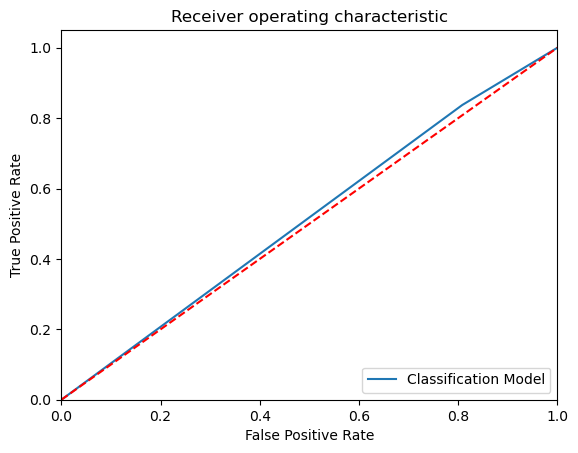

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[6902 3156]
 [6691 3630]]
Outcome values : 
 6902 3156 6691 3630
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.69      0.58     10058
           0       0.53      0.35      0.42     10321

    accuracy                           0.52     20379
   macro avg       0.52      0.52      0.50     20379
weighted avg       0.52      0.52      0.50     20379

Accuracy : 51.7 %
Precision : 50.8 %
Recall : 68.6 %
F1 Score : 0.584
Specificity or True Negative Rate : 35.2 %
Balanced Accuracy : 51.9 %
MCC : 0.04
roc_auc_score: 0.519


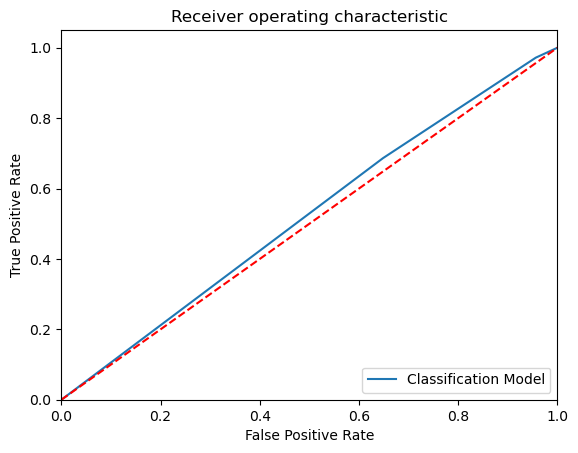

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[9169  889]
 [9136 1185]]
Outcome values : 
 9169 889 9136 1185
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.91      0.65     10058
           0       0.57      0.11      0.19     10321

    accuracy                           0.51     20379
   macro avg       0.54      0.51      0.42     20379
weighted avg       0.54      0.51      0.42     20379

Accuracy : 50.8 %
Precision : 50.1 %
Recall : 91.2 %
F1 Score : 0.647
Specificity or True Negative Rate : 11.5 %
Balanced Accuracy : 51.4 %
MCC : 0.044
roc_auc_score: 0.513


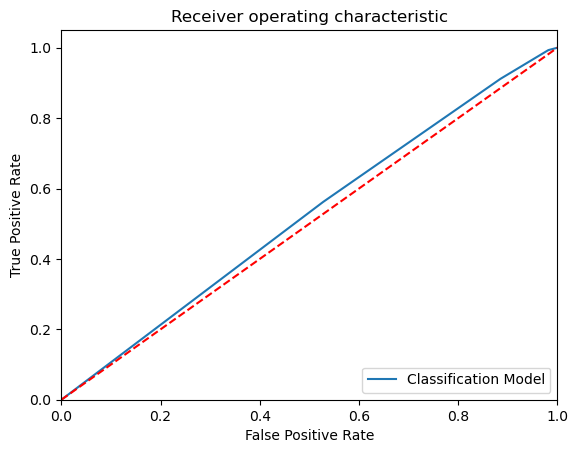

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[8499 1559]
 [8360 1961]]
Outcome values : 
 8499 1559 8360 1961
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.84      0.63     10058
           0       0.56      0.19      0.28     10321

    accuracy                           0.51     20379
   macro avg       0.53      0.52      0.46     20379
weighted avg       0.53      0.51      0.46     20379

Accuracy : 51.3 %
Precision : 50.4 %
Recall : 84.5 %
F1 Score : 0.631
Specificity or True Negative Rate : 19.0 %
Balanced Accuracy : 51.8 %
MCC : 0.046
roc_auc_score: 0.517


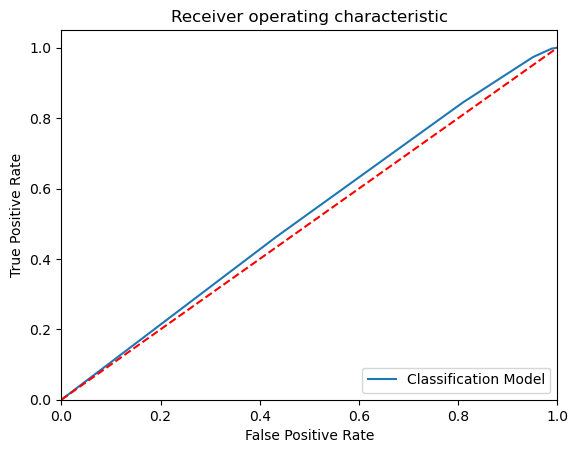

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[9499  559]
 [9416  905]]
Outcome values : 
 9499 559 9416 905
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.94      0.66     10058
           0       0.62      0.09      0.15     10321

    accuracy                           0.51     20379
   macro avg       0.56      0.52      0.40     20379
weighted avg       0.56      0.51      0.40     20379

Accuracy : 51.1 %
Precision : 50.2 %
Recall : 94.4 %
F1 Score : 0.656
Specificity or True Negative Rate : 8.8 %
Balanced Accuracy : 51.6 %
MCC : 0.062
roc_auc_score: 0.516


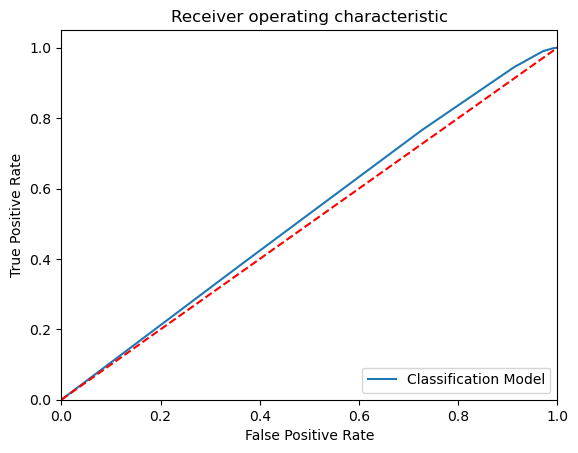

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[9132  926]
 [8922 1399]]
Outcome values : 
 9132 926 8922 1399
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.91      0.65     10058
           0       0.60      0.14      0.22     10321

    accuracy                           0.52     20379
   macro avg       0.55      0.52      0.44     20379
weighted avg       0.55      0.52      0.43     20379

Accuracy : 51.7 %
Precision : 50.6 %
Recall : 90.8 %
F1 Score : 0.65
Specificity or True Negative Rate : 13.6 %
Balanced Accuracy : 52.2 %
MCC : 0.068
roc_auc_score: 0.522


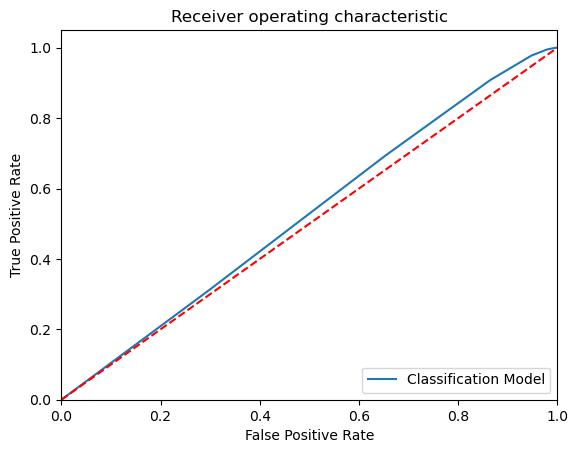

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[9623  435]
 [9493  828]]
Outcome values : 
 9623 435 9493 828
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.96      0.66     10058
           0       0.66      0.08      0.14     10321

    accuracy                           0.51     20379
   macro avg       0.58      0.52      0.40     20379
weighted avg       0.58      0.51      0.40     20379

Accuracy : 51.3 %
Precision : 50.3 %
Recall : 95.7 %
F1 Score : 0.66
Specificity or True Negative Rate : 8.0 %
Balanced Accuracy : 51.8 %
MCC : 0.077
roc_auc_score: 0.518


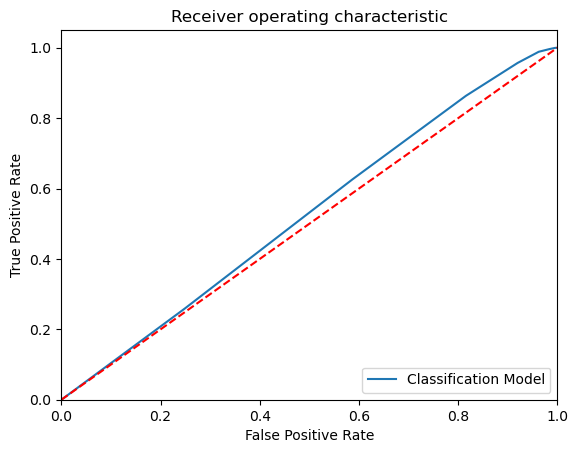

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[9399  659]
 [9172 1149]]
Outcome values : 
 9399 659 9172 1149
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.93      0.66     10058
           0       0.64      0.11      0.19     10321

    accuracy                           0.52     20379
   macro avg       0.57      0.52      0.42     20379
weighted avg       0.57      0.52      0.42     20379

Accuracy : 51.8 %
Precision : 50.6 %
Recall : 93.4 %
F1 Score : 0.657
Specificity or True Negative Rate : 11.1 %
Balanced Accuracy : 52.3 %
MCC : 0.081
roc_auc_score: 0.523


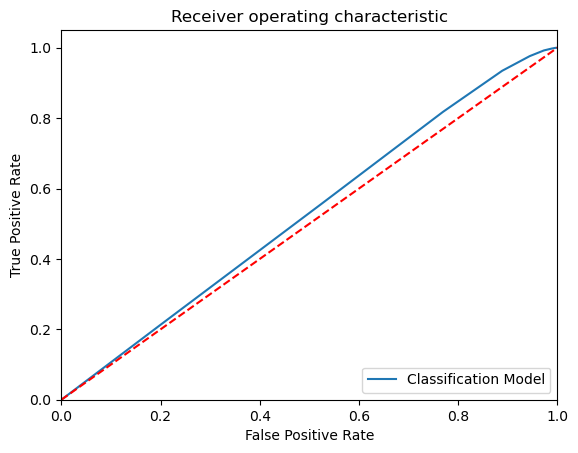

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[9667  391]
 [9477  844]]
Outcome values : 
 9667 391 9477 844
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.96      0.66     10058
           0       0.68      0.08      0.15     10321

    accuracy                           0.52     20379
   macro avg       0.59      0.52      0.40     20379
weighted avg       0.60      0.52      0.40     20379

Accuracy : 51.6 %
Precision : 50.5 %
Recall : 96.1 %
F1 Score : 0.662
Specificity or True Negative Rate : 8.2 %
Balanced Accuracy : 52.2 %
MCC : 0.09
roc_auc_score: 0.521


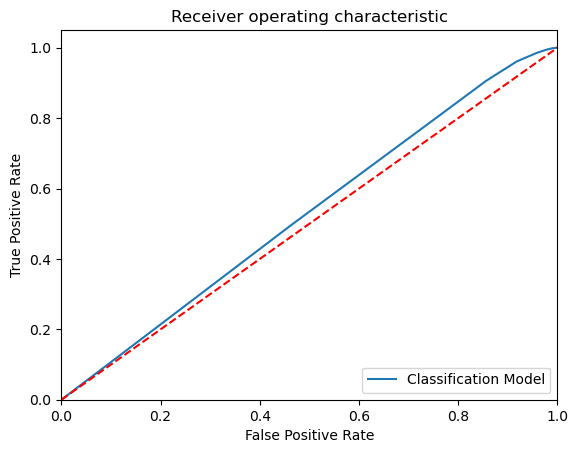

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[9489  569]
 [9230 1091]]
Outcome values : 
 9489 569 9230 1091
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.94      0.66     10058
           0       0.66      0.11      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.58      0.52      0.42     20379
weighted avg       0.58      0.52      0.42     20379

Accuracy : 51.9 %
Precision : 50.7 %
Recall : 94.3 %
F1 Score : 0.659
Specificity or True Negative Rate : 10.6 %
Balanced Accuracy : 52.4 %
MCC : 0.09
roc_auc_score: 0.525


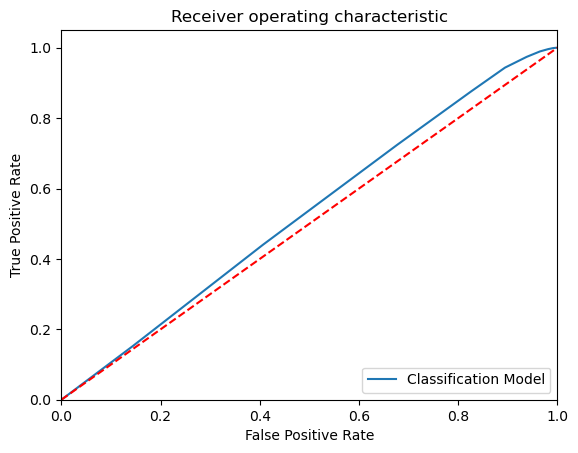

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[9680  378]
 [9465  856]]
Outcome values : 
 9680 378 9465 856
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.96      0.66     10058
           0       0.69      0.08      0.15     10321

    accuracy                           0.52     20379
   macro avg       0.60      0.52      0.41     20379
weighted avg       0.60      0.52      0.40     20379

Accuracy : 51.7 %
Precision : 50.6 %
Recall : 96.2 %
F1 Score : 0.663
Specificity or True Negative Rate : 8.3 %
Balanced Accuracy : 52.2 %
MCC : 0.095
roc_auc_score: 0.523


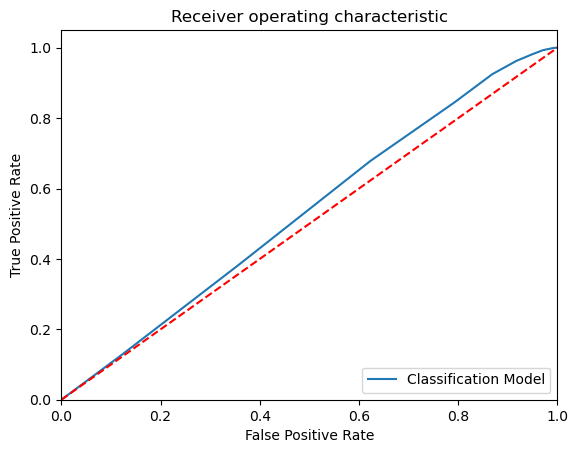

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[9536  522]
 [9246 1075]]
Outcome values : 
 9536 522 9246 1075
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.95      0.66     10058
           0       0.67      0.10      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.59      0.53      0.42     20379
weighted avg       0.59      0.52      0.42     20379

Accuracy : 52.1 %
Precision : 50.8 %
Recall : 94.8 %
F1 Score : 0.661
Specificity or True Negative Rate : 10.4 %
Balanced Accuracy : 52.6 %
MCC : 0.097
roc_auc_score: 0.526


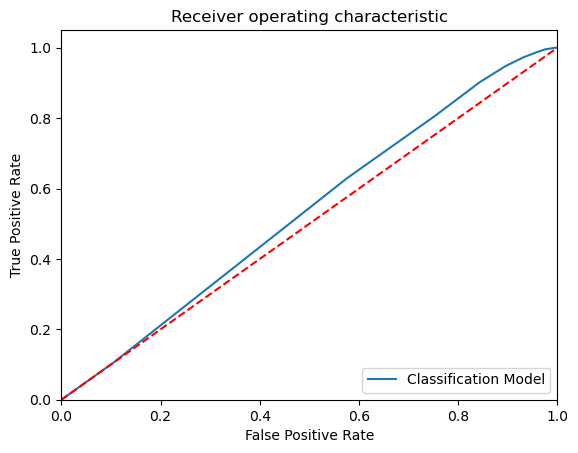

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[9690  368]
 [9426  895]]
Outcome values : 
 9690 368 9426 895
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.96      0.66     10058
           0       0.71      0.09      0.15     10321

    accuracy                           0.52     20379
   macro avg       0.61      0.53      0.41     20379
weighted avg       0.61      0.52      0.41     20379

Accuracy : 51.9 %
Precision : 50.7 %
Recall : 96.3 %
F1 Score : 0.664
Specificity or True Negative Rate : 8.7 %
Balanced Accuracy : 52.5 %
MCC : 0.104
roc_auc_score: 0.525


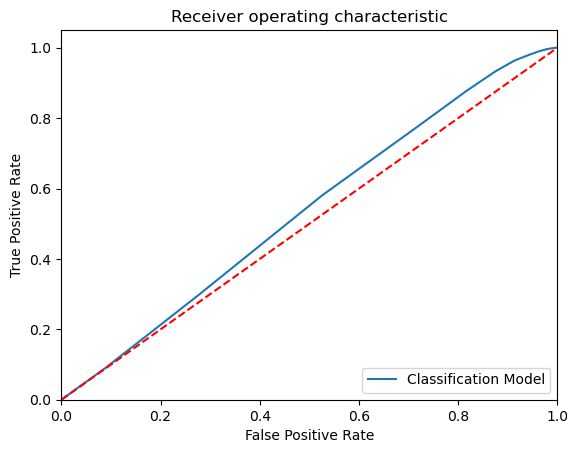

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[9571  487]
 [9243 1078]]
Outcome values : 
 9571 487 9243 1078
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.95      0.66     10058
           0       0.69      0.10      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.60      0.53      0.42     20379
weighted avg       0.60      0.52      0.42     20379

Accuracy : 52.3 %
Precision : 50.9 %
Recall : 95.2 %
F1 Score : 0.663
Specificity or True Negative Rate : 10.4 %
Balanced Accuracy : 52.8 %
MCC : 0.105
roc_auc_score: 0.528


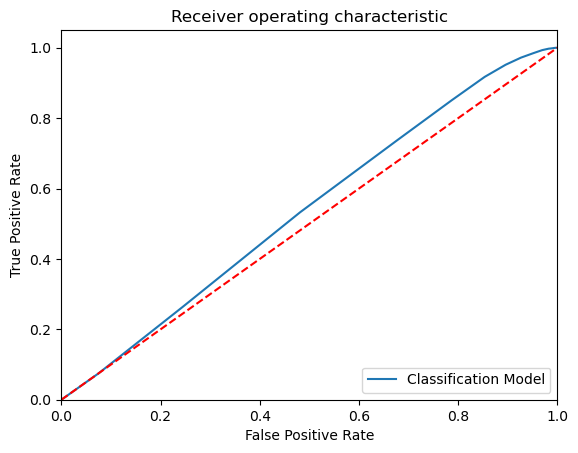

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[9689  369]
 [9407  914]]
Outcome values : 
 9689 369 9407 914
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.96      0.66     10058
           0       0.71      0.09      0.16     10321

    accuracy                           0.52     20379
   macro avg       0.61      0.53      0.41     20379
weighted avg       0.61      0.52      0.41     20379

Accuracy : 52.0 %
Precision : 50.7 %
Recall : 96.3 %
F1 Score : 0.665
Specificity or True Negative Rate : 8.9 %
Balanced Accuracy : 52.6 %
MCC : 0.107
roc_auc_score: 0.526


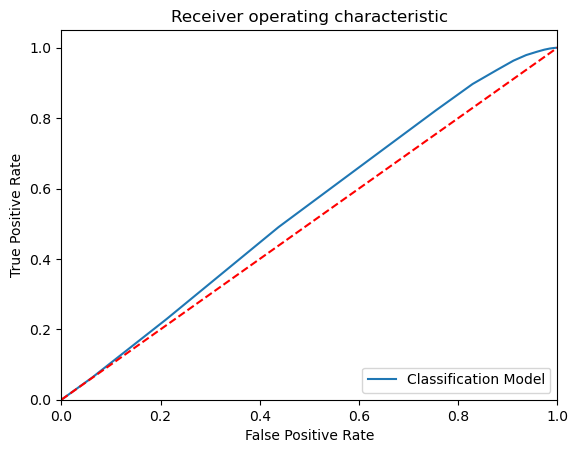

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[9574  484]
 [9255 1066]]
Outcome values : 
 9574 484 9255 1066
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.95      0.66     10058
           0       0.69      0.10      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.60      0.53      0.42     20379
weighted avg       0.60      0.52      0.42     20379

Accuracy : 52.2 %
Precision : 50.8 %
Recall : 95.2 %
F1 Score : 0.663
Specificity or True Negative Rate : 10.3 %
Balanced Accuracy : 52.8 %
MCC : 0.104
roc_auc_score: 0.528


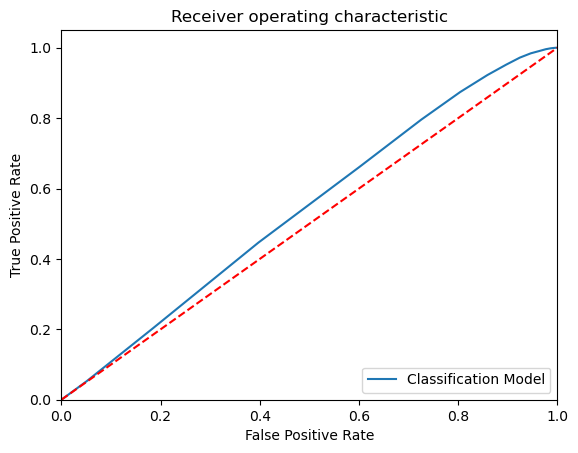

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[9671  387]
 [9382  939]]
Outcome values : 
 9671 387 9382 939
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.96      0.66     10058
           0       0.71      0.09      0.16     10321

    accuracy                           0.52     20379
   macro avg       0.61      0.53      0.41     20379
weighted avg       0.61      0.52      0.41     20379

Accuracy : 52.1 %
Precision : 50.8 %
Recall : 96.2 %
F1 Score : 0.664
Specificity or True Negative Rate : 9.1 %
Balanced Accuracy : 52.6 %
MCC : 0.106
roc_auc_score: 0.526


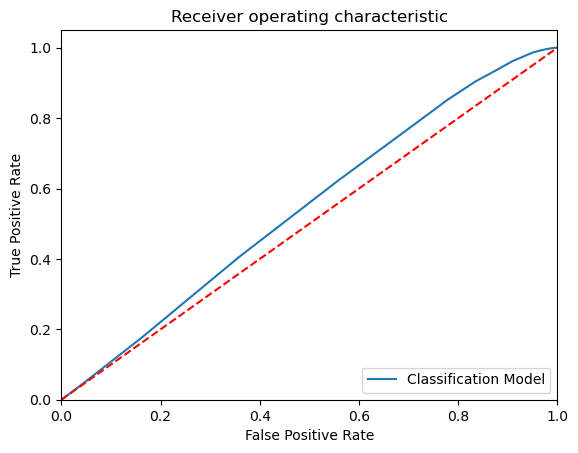

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[9574  484]
 [9244 1077]]
Outcome values : 
 9574 484 9244 1077
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.95      0.66     10058
           0       0.69      0.10      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.60      0.53      0.42     20379
weighted avg       0.60      0.52      0.42     20379

Accuracy : 52.3 %
Precision : 50.9 %
Recall : 95.2 %
F1 Score : 0.663
Specificity or True Negative Rate : 10.4 %
Balanced Accuracy : 52.8 %
MCC : 0.106
roc_auc_score: 0.528


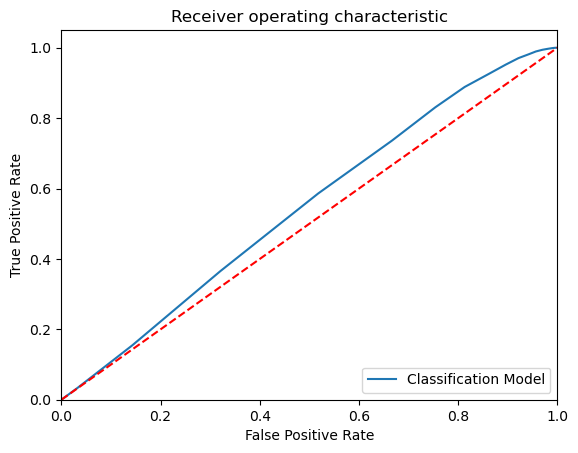

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[9667  391]
 [9382  939]]
Outcome values : 
 9667 391 9382 939
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.96      0.66     10058
           0       0.71      0.09      0.16     10321

    accuracy                           0.52     20379
   macro avg       0.61      0.53      0.41     20379
weighted avg       0.61      0.52      0.41     20379

Accuracy : 52.0 %
Precision : 50.7 %
Recall : 96.1 %
F1 Score : 0.664
Specificity or True Negative Rate : 9.1 %
Balanced Accuracy : 52.6 %
MCC : 0.105
roc_auc_score: 0.526


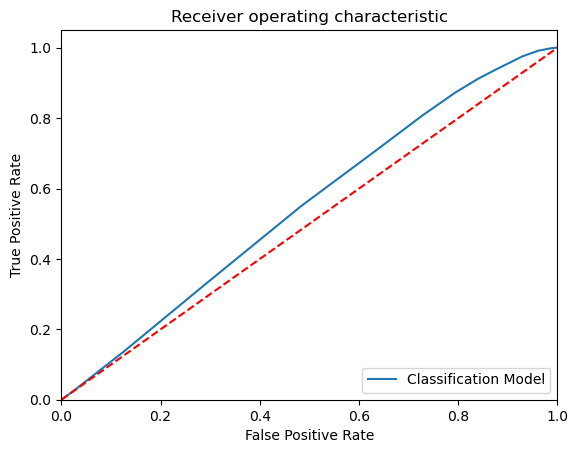

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[9570  488]
 [9220 1101]]
Outcome values : 
 9570 488 9220 1101
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.95      0.66     10058
           0       0.69      0.11      0.18     10321

    accuracy                           0.52     20379
   macro avg       0.60      0.53      0.42     20379
weighted avg       0.60      0.52      0.42     20379

Accuracy : 52.4 %
Precision : 50.9 %
Recall : 95.1 %
F1 Score : 0.663
Specificity or True Negative Rate : 10.7 %
Balanced Accuracy : 52.9 %
MCC : 0.108
roc_auc_score: 0.529


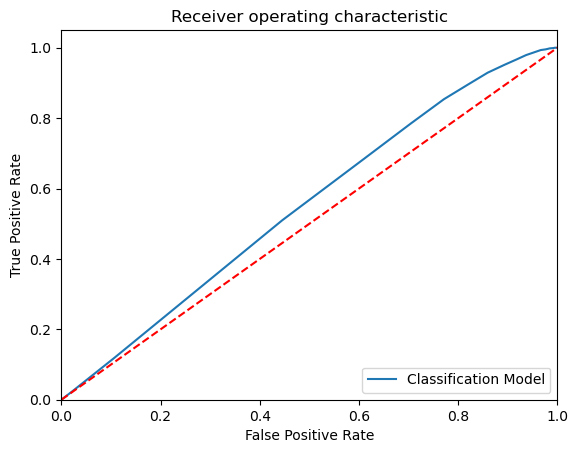

In [60]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)

In [61]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,8422,1636,8342,1979,0.510,0.502,0.837,0.628,0.192,0.038,0.514544,0.514
1,KNeighborsClassifier(n_neighbors=2),2,6902,3156,6691,3630,0.517,0.508,0.686,0.584,0.352,0.040,0.518965,0.519
2,KNeighborsClassifier(n_neighbors=3),3,9169,889,9136,1185,0.508,0.501,0.912,0.647,0.115,0.044,0.513214,0.514
3,KNeighborsClassifier(n_neighbors=4),4,8499,1559,8360,1961,0.513,0.504,0.845,0.631,0.190,0.046,0.517500,0.518
4,KNeighborsClassifier(),5,9499,559,9416,905,0.511,0.502,0.944,0.656,0.088,0.062,0.516054,0.516
5,KNeighborsClassifier(n_neighbors=6),6,9132,926,8922,1399,0.517,0.506,0.908,0.650,0.136,0.068,0.521741,0.522
6,KNeighborsClassifier(n_neighbors=7),7,9623,435,9493,828,0.513,0.503,0.957,0.660,0.080,0.077,0.518488,0.518
7,KNeighborsClassifier(n_neighbors=8),8,9399,659,9172,1149,0.518,0.506,0.934,0.657,0.111,0.081,0.522903,0.523
8,KNeighborsClassifier(n_neighbors=9),9,9667,391,9477,844,0.516,0.505,0.961,0.662,0.082,0.090,0.521450,0.522
9,KNeighborsClassifier(n_neighbors=10),10,9489,569,9230,1091,0.519,0.507,0.943,0.659,0.106,0.090,0.524567,0.524


# Compare the classification Algorithms

In [59]:
# Load the results file for classification
EMResults = pd.read_csv(r"/content/drive/MyDrive/Project 2023/EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [57]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, matthews_corrcoef,
                             jaccard_score, log_loss, cohen_kappa_score,
                             average_precision_score, brier_score_loss,
                             fowlkes_mallows_score, balanced_accuracy_score)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from math import sqrt

# Assuming you have x_train, x_test, y_train, y_test defined
# Replace them with your actual data

# Create objects of classification algorithms with default hyperparameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='linear', random_state=42, class_weight='balanced', probability=True)
ModelLGBM = LGBMClassifier()
ModelCatBoost = CatBoostClassifier()
ModelXGB = XGBClassifier()

# Add all models to the list
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, ModelLGBM, ModelCatBoost, ModelXGB]

results = []

for model in MM:
    # Train the model on the training dataset
    model.fit(x_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)

    # Calculate the additional metrics
    accuracy_final = model.score(x_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_prob)
    kappa = cohen_kappa_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    brier_loss = brier_score_loss(y_test, y_pred)
    fowlkes_mallows = fowlkes_mallows_score(y_test, y_pred)
    gini_coefficient = 2 * roc_auc - 1
    bcr = (recall + specificity) / 2

    # Confusion matrix in sklearn
    matrix = confusion_matrix(y_test, y_pred, labels=[1, 0], sample_weight=None, normalize=None)

    # Outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).reshape(-1)

    # Calculating the metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp / (2 * tp + fp + fn)), 3)

    # Matthews Correlation Coefficient (MCC)
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    # Append results to the list
    results.append({
        'Model Name': type(model).__name__,
        'Accuracy': accuracy_final,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity,
        'Balanced Accuracy': balanced_accuracy,
        'MCC': mcc,
        'ROC AUC': roc_auc,
        'Jaccard Index': jaccard,
        'Logloss': logloss,
        'Cohen\'s Kappa': kappa,
        'Average Precision': average_precision,
        'Brier Loss': brier_loss,
        'Fowlkes-Mallows Index': fowlkes_mallows,
        'Gini Coefficient': gini_coefficient,
        'Balanced Classification Rate (BCR)': bcr
    })

# Create a DataFrame from the results list
CA_result = pd.DataFrame(results)

# Save results to CSV file
CA_result.to_csv('BasicMLresults.csv', index=False)


from google.colab import files
# Download the file to your local machine
files.download('BasicMLresults.csv')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18807, number of negative: 20099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 38906, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483396 -> initscore=-0.066441
[LightGBM] [Info] Start training from score -0.066441
Learning rate set to 0.049189
0:	learn: 0.6782351	total: 68.3ms	remaining: 1m 8s
1:	learn: 0.6652959	total: 82.4ms	remaining: 41.1s
2:	learn: 0.6534404	total: 96.6ms	remaining: 32.1s
3:	learn: 0.6431426	total: 113ms	remaining: 28.2s
4:	learn: 0.6344856	total: 126ms	remaining: 25.1s
5:	learn: 0.6259246	total: 140ms	remaining: 23.3s
6:	learn: 0.6184819	total: 15

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
CA_result

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,Balanced Accuracy,MCC,ROC AUC,Jaccard Index,Logloss,Cohen's Kappa,Average Precision,Brier Loss,Fowlkes-Mallows Index,Gini Coefficient,Balanced Classification Rate (BCR)
0,LogisticRegression,0.641598,0.586,0.899176,0.709931,0.396,0.648,0.340125,0.647750,0.550305,0.635722,0.291784,0.576540,0.358402,0.594018,0.295500,0.647750
1,DecisionTreeClassifier,0.467194,0.243,0.043649,0.074005,0.871,0.458,-0.151759,0.457078,0.038424,19.204259,-0.087559,0.477081,0.532806,0.649784,-0.085844,0.457078
2,RandomForestClassifier,0.535564,0.514,0.906185,0.655577,0.183,0.544,0.128230,0.544417,0.487627,0.711177,0.087240,0.511134,0.464436,0.618589,0.088833,0.544417
3,ExtraTreesClassifier,0.608732,0.564,0.873847,0.685408,0.356,0.615,0.267815,0.615064,0.521385,0.657220,0.227146,0.554229,0.391268,0.582807,0.230129,0.615064
4,KNeighborsClassifier,0.644476,0.597,0.835731,0.696343,0.462,0.649,0.320229,0.649045,0.534145,0.701249,0.295266,0.578892,0.355524,0.571715,0.298089,0.649045
5,GaussianNB,0.487765,0.488,1.000000,0.655702,0.000,0.500,0.000000,0.500000,0.487765,14.987691,0.000000,0.487765,0.512235,0.707297,0.000000,0.500000
6,SVC,0.579225,0.539,0.953892,0.688621,0.222,0.588,0.256799,0.588174,0.525112,0.747887,0.173161,0.536435,0.420775,0.628376,0.176348,0.588174
7,LGBMClassifier,0.528248,0.509,0.976638,0.668828,0.101,0.539,0.159973,0.538957,0.502435,0.872228,0.076239,0.508062,0.471752,0.665076,0.077915,0.538957
8,CatBoostClassifier,0.528667,0.509,0.924013,0.656647,0.152,0.538,0.119410,0.538110,0.488812,0.966374,0.074766,0.507649,0.471333,0.632350,0.076220,0.538110
9,XGBClassifier,0.528667,0.510,0.890446,0.648257,0.184,0.537,0.105099,0.537308,0.479571,1.006957,0.073308,0.507245,0.471333,0.612975,0.074617,0.537308
